In [1]:
%matplotlib inline


# Linear Regression Example

This example uses the only the first feature of the `d0` dataset, in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The coefficients, the residual sum of squares and the variance score are also
calculated.




In [46]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Automatically created module for IPython interactive environment


In [72]:
# Load the d0 dataset
d0 = datasets.load_diabetes()
print(d0.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [86]:
df0 = pd.read_csv("diabetes.csv")
df0.info()

df0[["BMI"]].values.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
AGE    442 non-null int64
SEX    442 non-null int64
BMI    442 non-null float64
BP     442 non-null float64
S1     442 non-null int64
S2     442 non-null float64
S3     442 non-null float64
S4     442 non-null float64
S5     442 non-null float64
S6     442 non-null int64
Y      442 non-null int64
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


(442, 1)

In [157]:
p0 = "BMI"

In [158]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

x0 = df0[[p0]].values
x0

# column vectors only
# row vector would be print(np.reshape(x0, (1,len(x0))))

trns = RobustScaler()

df0['sX'] = trns.fit_transform(x0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed10d82cf8>]],
      dtype=object)

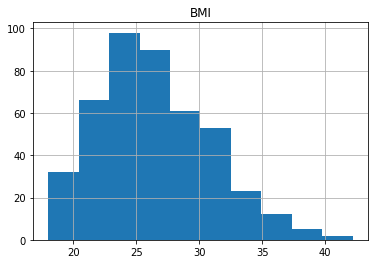

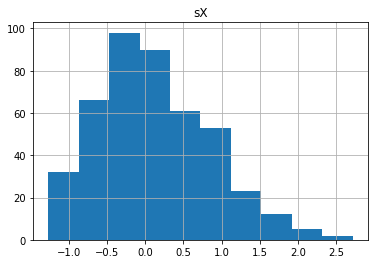

In [159]:
df0[['sX', p0]]
df0[[p0]].hist()
df0[['sX']].hist()

In [195]:
# Use only one feature and a use array of arrays representation for Body-Mass-Index
# These are all normalized 
d0_X = d0.data[:, np.newaxis, 2]

# Split the data into training/testing sets
d0_X_train = d0_X[:-20]
d0_X_test = d0_X[-20:]

# Split the targets into training/testing sets
d0_y_train = d0.target[:-20]
d0_y_test = d0.target[-20:]

In [199]:
# Use only one feature and a use array of arrays representation for Body-Mass-Index
# These are all normalized 
d0_X = df0[['sX']].values

# Split the data into training/testing sets
d0_X_train = d0_X[:-20]
d0_X_test = d0_X[-20:]

# Split the targets into training/testing sets
y0 = df0[['Y']].values

d0_y_train = y0[:-20]
d0_y_test = y0[-20:]

In [200]:
d0_y_test

array([[233],
       [ 91],
       [111],
       [152],
       [120],
       [ 67],
       [310],
       [ 94],
       [183],
       [ 66],
       [173],
       [ 72],
       [ 49],
       [ 64],
       [ 48],
       [178],
       [104],
       [132],
       [220],
       [ 57]])

Some working with other

In [67]:
d1 = pd.DataFrame(d0.data, columns=d0.feature_names)
d1.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed12d21c50>]],
      dtype=object)

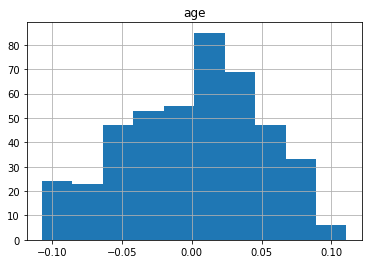

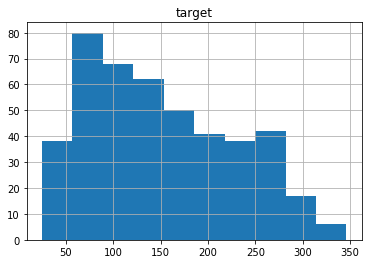

In [70]:
d1['target'] = pd.Series(d0.target)
d1[['age']].hist()
d1[['target']].hist()

In [44]:
d0_X = d0.data[:, np.newaxis, 2]
d0_X[:-20]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [63]:
d0a = d0.data[:,np.newaxis,2]
sk.model_selection.train_test_split(d0a)

[array([[-0.0277622 ],
        [ 0.01427248],
        [ 0.03798434],
        [ 0.0164281 ],
        [ 0.09618619],
        [ 0.06924089],
        [ 0.097264  ],
        [ 0.13714305],
        [ 0.04660684],
        [ 0.02289497],
        [-0.03315126],
        [-0.03099563],
        [-0.01806189],
        [ 0.00564998],
        [-0.02452876],
        [ 0.0703187 ],
        [ 0.00457217],
        [ 0.06492964],
        [-0.08380842],
        [ 0.03043966],
        [-0.01482845],
        [ 0.00133873],
        [-0.02560657],
        [-0.06979687],
        [ 0.07139652],
        [-0.06009656],
        [-0.00297252],
        [ 0.01211685],
        [-0.01806189],
        [-0.046085  ],
        [-0.01159501],
        [-0.00297252],
        [ 0.06924089],
        [-0.07626374],
        [-0.05794093],
        [-0.046085  ],
        [-0.05794093],
        [-0.05794093],
        [ 0.00672779],
        [ 0.02612841],
        [-0.0547075 ],
        [-0.03854032],
        [-0.02452876],
        [ 0

In [163]:
type(d0)
print(d0.__dir__())
print(d0.DESCR)
print(d0.data_filename)

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source U

In [31]:
print(d0.data.shape)

print(d0.data[1:10,:].shape)

d0.data[1:10,:]

(442, 10)
(9, 10)


array([[-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944209, -0.06899065,
        -0.07928784,  0.04127682, -0.0763945 , -0.04118039, -0.09634616],
       [-0.04547248,  0.05068012, -0.04716281, -0.01599922, -0.04009564,
        -0.02480001,  0.00077881, -0.03949338, -0.06291295, -0.03835666],
       [ 0.06350368,  0.05068012, -0.00189471,  0.06662967,  0.09061988,
         0.10891438,  0.02286863,  0.01770335

In [179]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(d0_X_train, d0_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [190]:
# Use whole data set
Y_test, X_test = (np.append(d0_y_train, d0_y_test), np.append(d0_X_train, d0_X_test))
Y_test = Y_test.reshape(Y_test.shape[0], 1)
X_test = X_test.reshape(X_test.shape[0], 1)

In [191]:
regr.fit(X_test, Y_test) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [201]:
# Or train on the subset and choose the prediction set.
Y_test, X_test = (d0_y_test, d0_X_test)
Y_test, X_test = (d0_y_train, d0_X_train)

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(d0_X_train, d0_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [202]:
# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Coefficients: 
 [[61.43307877]]
Mean squared error: 3955.02
Variance score: 0.34


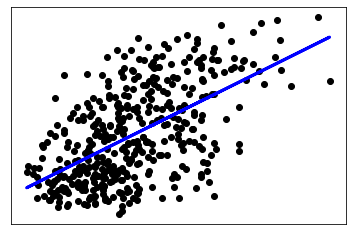

In [203]:
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()